In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_squared_error  # MSE
from sklearn.metrics import mean_absolute_error  # MAE

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


In [2]:
df = pd.read_csv('/Users/maanbing/Documents/UCL/CASA0004/data/new_project/csvfile/DatasetByWard.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111 entries, 0 to 110
Data columns (total 24 columns):
 #   Column                                                             Non-Null Count  Dtype  
---  ------                                                             --------------  -----  
 0   ADI_percent                                                        111 non-null    float64
 1   building area median                                               111 non-null    float64
 2   building density                                                   111 non-null    float64
 3   median age                                                         111 non-null    float64
 4   population density                                                 111 non-null    float64
 5   English speakers                                                   111 non-null    float64
 6   Afrikaans speakers                                                 111 non-null    float64
 7   people born in SA         

In [118]:
random_state_split = 100
train_x, test_x, train_y, test_y = train_test_split(df.drop(['ADI_percent'], axis = 1), df.ADI_percent, test_size = 0.3, random_state=100)

In [119]:
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

# check the index of train_x and train_y - they should be identical. The index indicates which rows from the original data.

print(train_x.index.identical(train_y.index))
print(test_x.index.identical(test_y.index))

(77, 23)
(77,)
(34, 23)
(34,)
True
True


In [120]:
train_x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77 entries, 20 to 8
Data columns (total 23 columns):
 #   Column                                                             Non-Null Count  Dtype  
---  ------                                                             --------------  -----  
 0   building area median                                               77 non-null     float64
 1   building density                                                   77 non-null     float64
 2   median age                                                         77 non-null     float64
 3   population density                                                 77 non-null     float64
 4   English speakers                                                   77 non-null     float64
 5   Afrikaans speakers                                                 77 non-null     float64
 6   people born in SA                                                  77 non-null     float64
 7   Households density          

In [113]:
test_y.head(12)

25    0.047972
51    0.045109
21    0.078763
26    0.007426
64    0.043326
43    0.063160
29    0.050300
92    0.080531
75    0.049198
85    0.090837
41    0.055662
78    0.089972
Name: ADI_percent, dtype: float64

In [131]:
forest = RandomForestRegressor(
    n_estimators=150,
    max_features= 18,
    random_state=1,
    n_jobs=-1)
forest.fit(train_x, train_y)

RandomForestRegressor(max_features=18, n_estimators=150, n_jobs=-1,
                      random_state=1)

In [132]:
score = forest.score(test_x, test_y)
print('随机森林模型得分： ', score)
test_y_pred = forest.predict(test_x)

随机森林模型得分：  0.6264961492490643


In [123]:
test_y_pred

array([0.04276035, 0.06205957, 0.0471509 , 0.01076088, 0.0724874 ,
       0.09650508, 0.05982992, 0.07373317, 0.07490936, 0.07404316,
       0.07286061, 0.10879957, 0.003156  , 0.07364148, 0.09661172,
       0.08466132, 0.01646186, 0.06698648, 0.01028789, 0.07781365,
       0.08190219, 0.06697875, 0.11294479, 0.08939098, 0.03008663,
       0.06767053, 0.07585483, 0.08769415, 0.05412556, 0.06442336,
       0.00658836, 0.08630164, 0.0125945 , 0.00632875])

In [136]:
print('随机森林模型得分： ', score)
print('Mean Absolute Error:', mean_absolute_error(test_y, test_y_pred))
print('Mean Squared Error:', mean_squared_error(test_y, test_y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(test_y, test_y_pred)))

随机森林模型得分：  0.6264961492490643
Mean Absolute Error: 0.018753340272352943
Mean Squared Error: 0.0007487378714217849
Root Mean Squared Error: 0.027363074962836045


In [73]:
import rfpimp

                                                    Importance
Feature                                                       
building area median                                  0.106733
Households with internet access                       0.043378
Households density                                    0.039854
getting refuse disposal from a local authority ...    0.025348
population density                                    0.024220
Households with women as their head                   0.023559
Completed Matric or higher                            0.009155
Households that are informal dwellings (shacks)       0.007965
Households with heads under 18 years old              0.005584
Have access to flush or chemical toilets              0.005128
Employed                                              0.004406
English speakers                                      0.004003
Completed Grade 9 or higher                           0.003554
Average annual income                                 0

/opt/anaconda3/lib/python3.8/site-packages/rfpimp.py:52: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


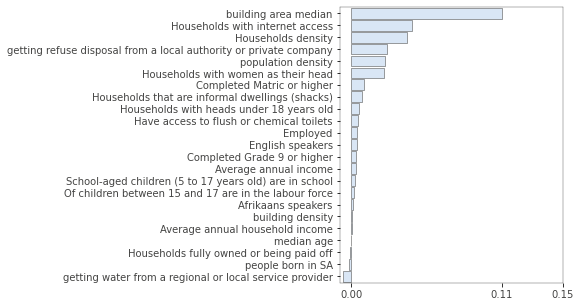

In [145]:
imp = rfpimp.importances(forest, test_x, test_y) # permutation
print(imp)
viz = rfpimp.plot_importances(imp)
viz.view()